In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integ
import scipy.special as sf
import matplotlib as mpl
from astropy.io import ascii
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
from scipy.stats import binned_statistic
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = [7,5]
#import Fraunhofer
%run Fraunhofer

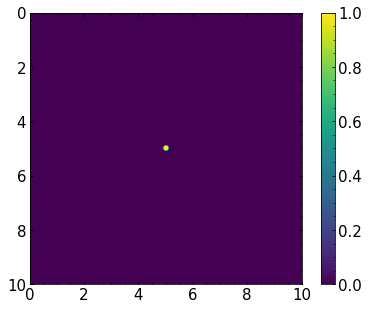

In [33]:

screen = {}
screen['N'] = 4096
screen['D'] = 10
Initialize(screen)
center = (screen['D']/2, screen['D']/2)
radius = 0.1
#c1 = (screen['D']/2, screen['D']/2)
CircleAtten(screen,center,radius,1.)
InCircle(screen, center, radius)
ScreenFFT(screen)

lam = 0.002 #m wavelength
kphot = 2*np.pi/lam
thetamaxdeg = 2.
thetamax = thetamaxdeg*np.pi/180. # 2 degrees in radians
theta_vec = np.linspace(-thetamax,thetamax,1024) 
II0 = Project_I_on_thetagrid(theta_vec,screen,lam) 

plt.imshow(screen['E'],extent=(0,screen['D'],screen['D'],0))
plt.colorbar()

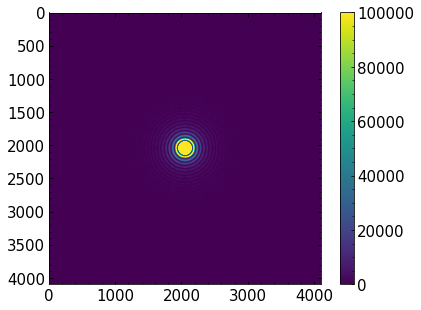

In [29]:
plt.imshow(screen['I'], vmax=1e5)
plt.colorbar()

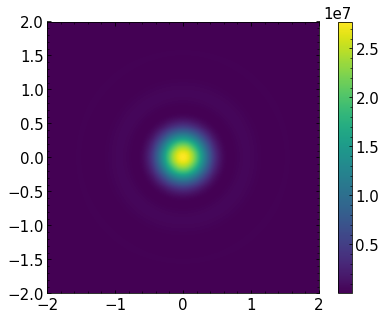

In [31]:
plt.imshow(II0, extent=(-thetamaxdeg, thetamaxdeg, -thetamaxdeg, thetamaxdeg))
plt.colorbar()

In [21]:
theta_1min = 1.22*lam/(2*radius)
theta_2min = (7.0156/np.pi) * lam / (2*radius)
theta_3min = (10.1735/np.pi) * lam / (2*radius)
theta_1min_deg = theta_1min *180/np.pi 
theta_2min_deg = theta_2min *180/np.pi 
theta_3min_deg = theta_3min *180/np.pi 
print(theta_1min_deg,'degrees')
print(theta_2min_deg,'degrees')
print(theta_3min_deg,'degrees')


0.6990085100596043 degrees
1.279492012730133 degrees
1.855423911213582 degrees


Text(0.5, 0, 'degrees')

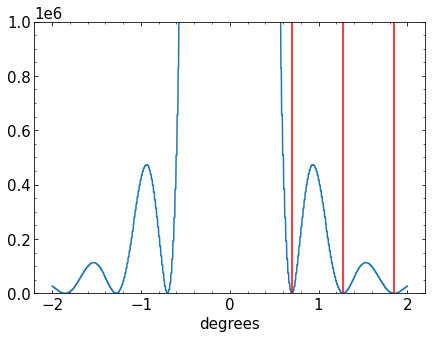

In [23]:
plt.plot(theta_vec*180/np.pi, II0[int(len(theta_vec)/2)])
plt.ylim(0,1e6)
plt.axvline(x=theta_1min_deg,color='red')
plt.axvline(x=theta_2min_deg,color='red')
plt.axvline(x=theta_3min_deg,color='red')
plt.xlabel('degrees')

2.233134837511002

In [2]:
opt.minimize?

Signature:
opt.minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized.

        ``fun(x, *args) -> float``

    where ``x`` is a 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.
x0 : ndarray, shape (n,)
    Initial guess. Array of real elements of size (n,),
    where ``n`` is the number of independent variables.
args : tuple, optional
    Extra arguments passed to the objective function and its
    derivatives (`fun`, `jac` and `hess` functions).
method : str or callable, optional
    Type of solver.  Should be one of

        - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
        - 'Powell'      :ref:`(see her